### **Analisando os Dados (EDA)**

**Objetivo**: analisar os dados obtidos após estruturação (camada Gold). 

A criação da camada Gold auxilia para realizar a análise dos dados obtidos, sendo útil para elaborar relatórios ou outra aplicabilidade, como por exemplo, implementação de algum modelo de ML.

In [2]:
import pandas as pd

In [6]:
path_file = "../../datalake/Gold/twitter_datascience/process_date=2024-07-05/part-00000-be014e0a-3b76-49eb-bd4e-2daf5fbe76b2-c000.json"
df = pd.read_json(path_file, lines=True)

In [7]:
df.head()

,created_date,n_tweets,n_like,n_quote,n_reply,n_retweet,weekday
0,2024-05-30,10,994,816,872,1166,Thu
1,2024-05-29,9,1068,1162,856,948,Wed
2,2024-06-02,45,5646,5560,6732,6100,Sun
3,2024-07-02,16,2372,2566,1942,2282,Tue
4,2024-05-31,18,1840,1886,2304,1750,Fri


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_date  13 non-null     object
 1   n_tweets      13 non-null     int64 
 2   n_like        13 non-null     int64 
 3   n_quote       13 non-null     int64 
 4   n_reply       13 non-null     int64 
 5   n_retweet     13 non-null     int64 
 6   weekday       13 non-null     object
dtypes: int64(5), object(2)
memory usage: 856.0+ bytes


In [9]:
# Transformar a coluna de 'created_date' em formato de data
df.created_date = pd.to_datetime(df.created_date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   created_date  13 non-null     datetime64[ns]
 1   n_tweets      13 non-null     int64         
 2   n_like        13 non-null     int64         
 3   n_quote       13 non-null     int64         
 4   n_reply       13 non-null     int64         
 5   n_retweet     13 non-null     int64         
 6   weekday       13 non-null     object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 856.0+ bytes


<Axes: title={'center': 'Weekly Twitter Activity'}, xlabel='weekday'>

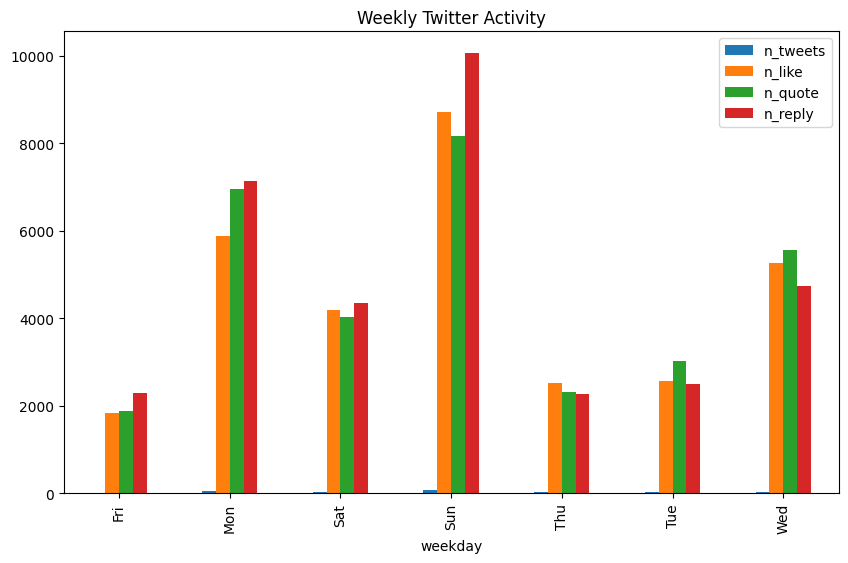

In [16]:
# Visualização

# datetime64 não deixa fazer operação de soma:
grouped_df = df.groupby("weekday").sum(numeric_only=True).reset_index()

# Plot os dados
grouped_df.plot(kind="bar", x="weekday", y=["n_tweets", "n_like", "n_quote", "n_reply"], figsize=(10, 6), title="Weekly Twitter Activity")